       X1               X2              X3              X4           Y         
 Min.   : 1.000   Min.   :26.00   Min.   : 4.00   Min.   : 6   Min.   : 72.50  
 1st Qu.: 2.000   1st Qu.:31.00   1st Qu.: 8.00   1st Qu.:20   1st Qu.: 83.80  
 Median : 7.000   Median :52.00   Median : 9.00   Median :26   Median : 95.90  
 Mean   : 7.462   Mean   :48.15   Mean   :11.77   Mean   :30   Mean   : 95.42  
 3rd Qu.:11.000   3rd Qu.:56.00   3rd Qu.:17.00   3rd Qu.:44   3rd Qu.:109.20  
 Max.   :21.000   Max.   :71.00   Max.   :23.00   Max.   :60   Max.   :115.90  

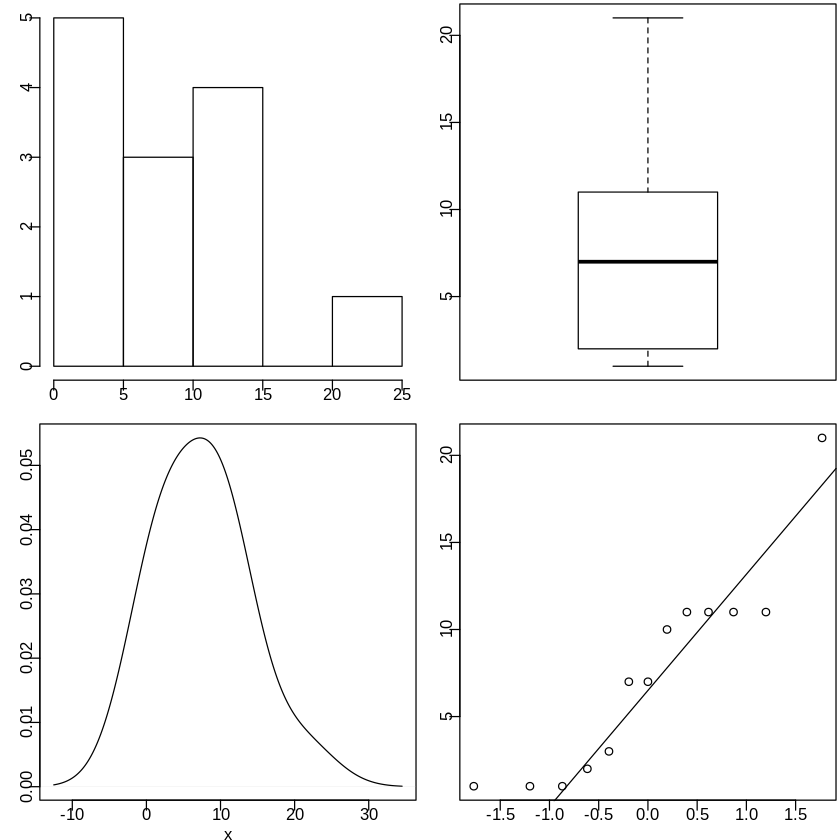

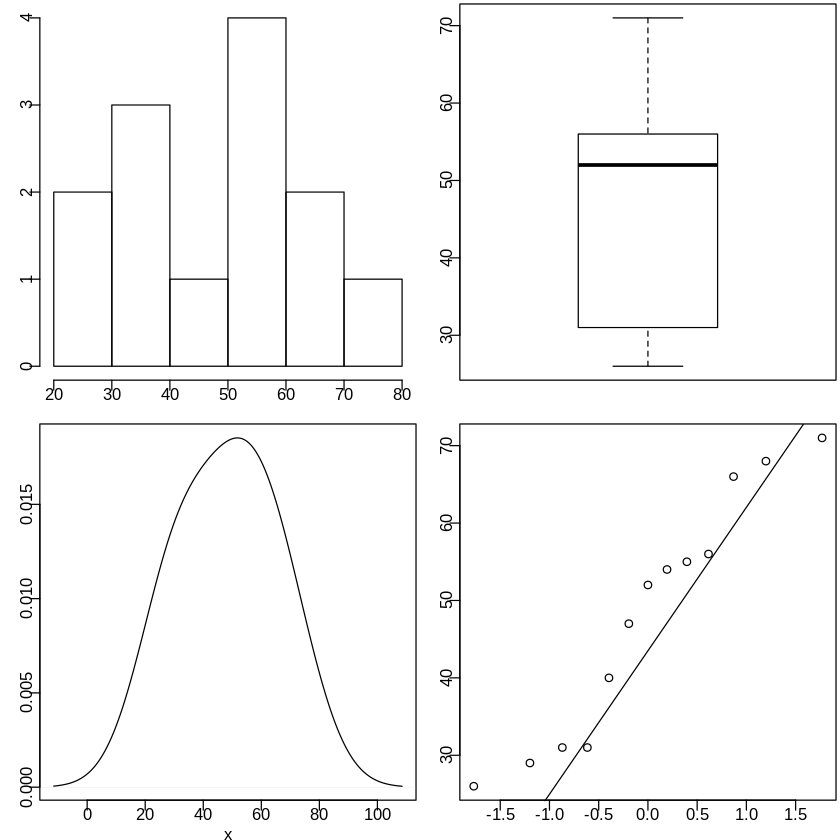

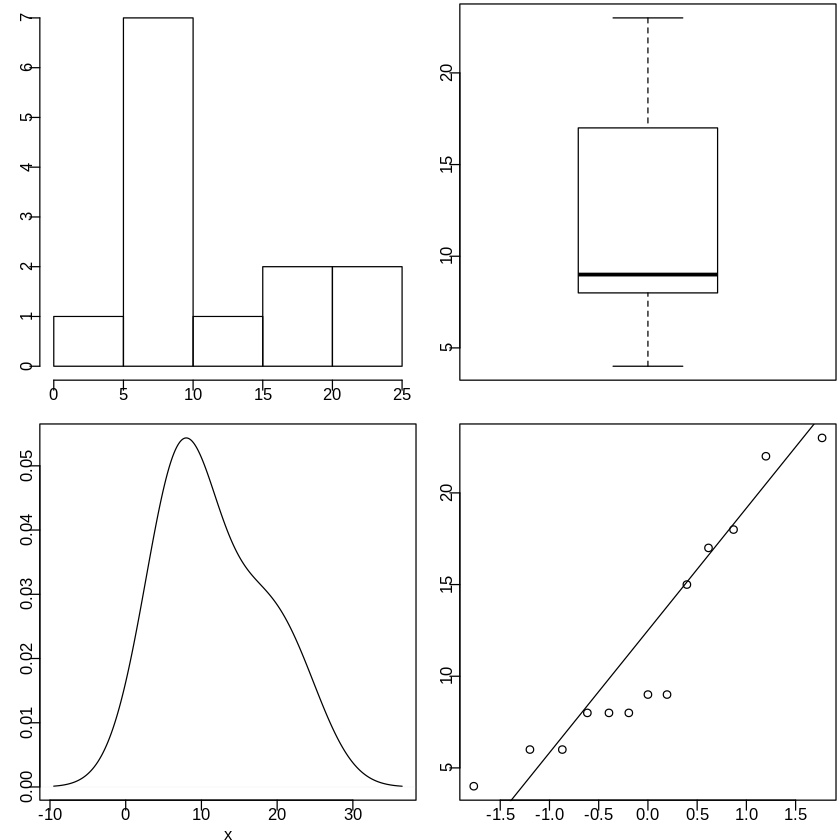

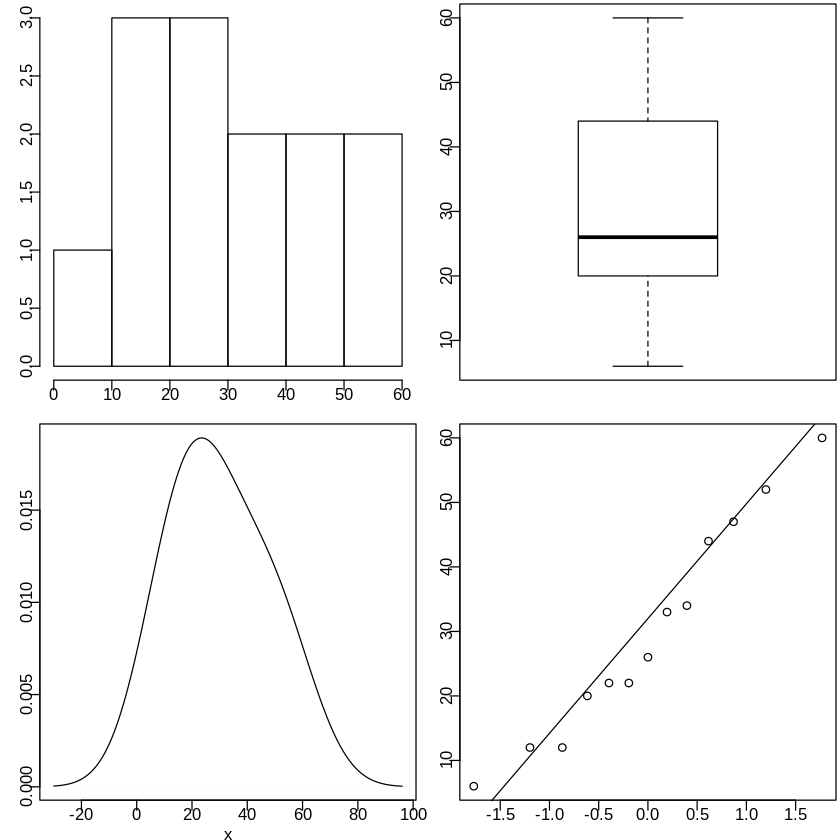

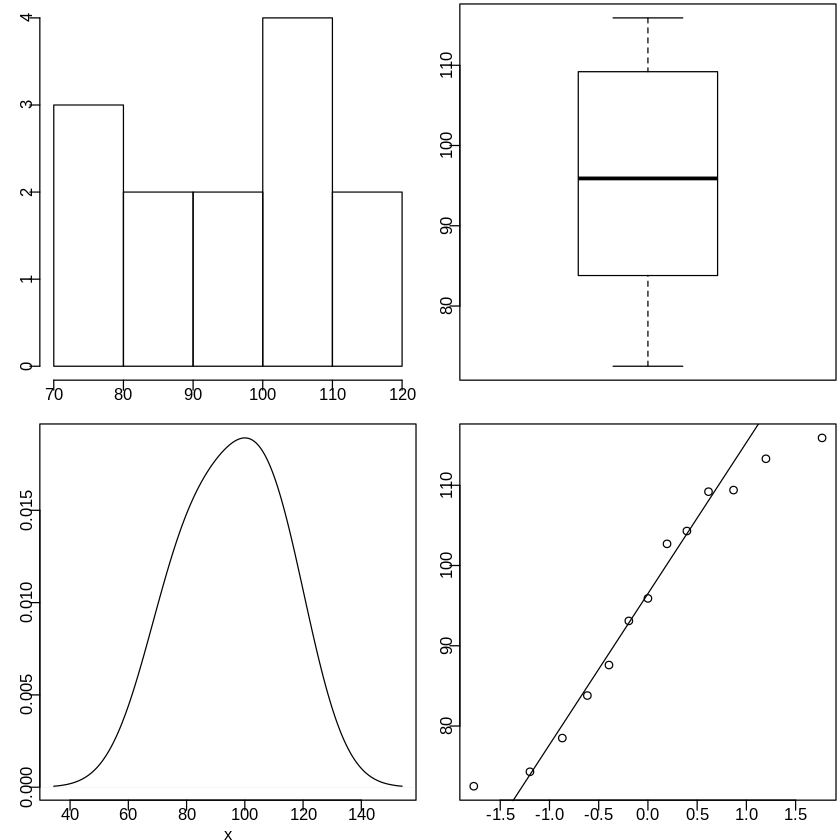

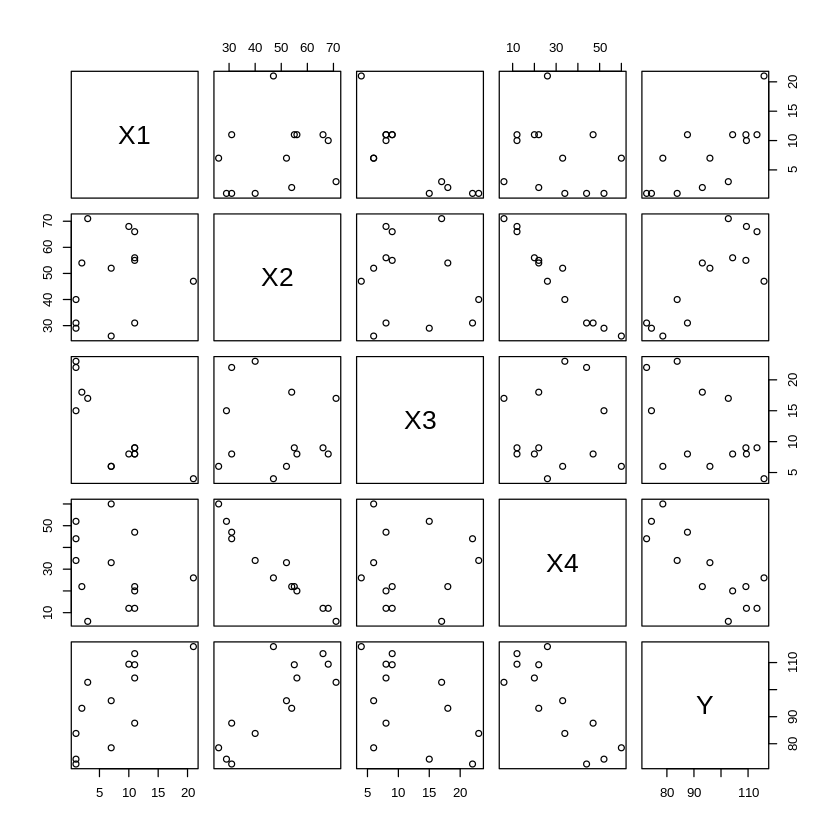

In [1]:
cement <- read.table("cement.txt", header=T, sep='\t')
eda.shape=function(x) {  
                          oldpar = par(mfrow = c(2, 2), mar=c(2,2,0.2,0.2),      
                          mgp=c(1.2,0.2,0));
                          hist(x, main="", xlab="", ylab="");
                           boxplot(x) ;
                           iqd = summary(x)[5] - summary(x)[2];  #计算四分位间距
                          plot(density(x,width=2*iqd), xlab = "x",  ylab = "",
                                  type = "l", main="") ;
                          qqnorm(x, main="", xlab="", ylab="");
                          qqline(x);
                           par(oldpar);
                           invisible()         # 调用此函数时不要显示任何返回值。
       }
attach(cement)
summary(cement)
eda.shape(X1)
eda.shape(X2)
eda.shape(X3)
eda.shape(X4)
eda.shape(Y)
pairs(cbind(X1,X2,X3,X4,Y))

In [2]:
t.test(X1,Y)
t.test(X2,Y)
t.test(X3,Y)
t.test(X4,Y)


	Welch Two Sample t-test

data:  X1 and Y
t = -19.634, df = 15.586, p-value = 2.062e-12
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -97.47929 -78.44379
sample estimates:
mean of x mean of y 
 7.461538 95.423077 



	Welch Two Sample t-test

data:  X2 and Y
t = -7.8744, df = 23.973, p-value = 4.205e-08
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -59.65938 -34.87908
sample estimates:
mean of x mean of y 
 48.15385  95.42308 



	Welch Two Sample t-test

data:  X3 and Y
t = -18.447, df = 16.212, p-value = 2.625e-12
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -93.25701 -74.05068
sample estimates:
mean of x mean of y 
 11.76923  95.42308 



	Welch Two Sample t-test

data:  X4 and Y
t = -10.481, df = 23.732, p-value = 2.207e-10
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -78.31322 -52.53293
sample estimates:
mean of x mean of y 
 30.00000  95.42308 



Call:
lm(formula = Y ~ X1 + X2 + X3 + X4, data = cement)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1750 -1.6709  0.2508  1.3783  3.9254 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  62.4054    70.0710   0.891   0.3991  
X1            1.5511     0.7448   2.083   0.0708 .
X2            0.5102     0.7238   0.705   0.5009  
X3            0.1019     0.7547   0.135   0.8959  
X4           -0.1441     0.7091  -0.203   0.8441  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.446 on 8 degrees of freedom
Multiple R-squared:  0.9824,	Adjusted R-squared:  0.9736 
F-statistic: 111.5 on 4 and 8 DF,  p-value: 4.756e-07


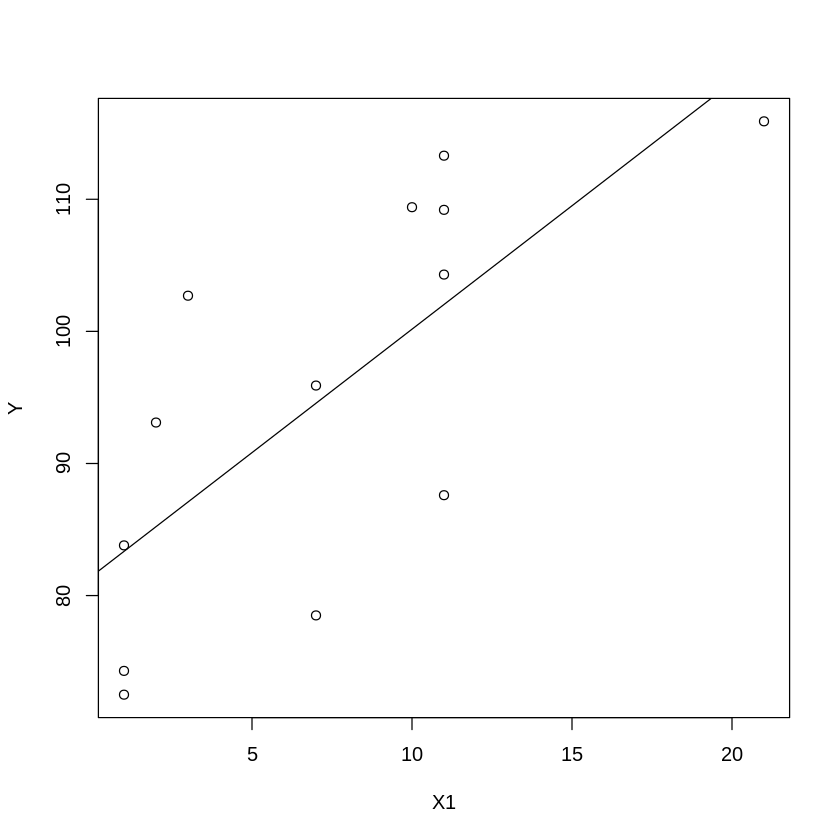

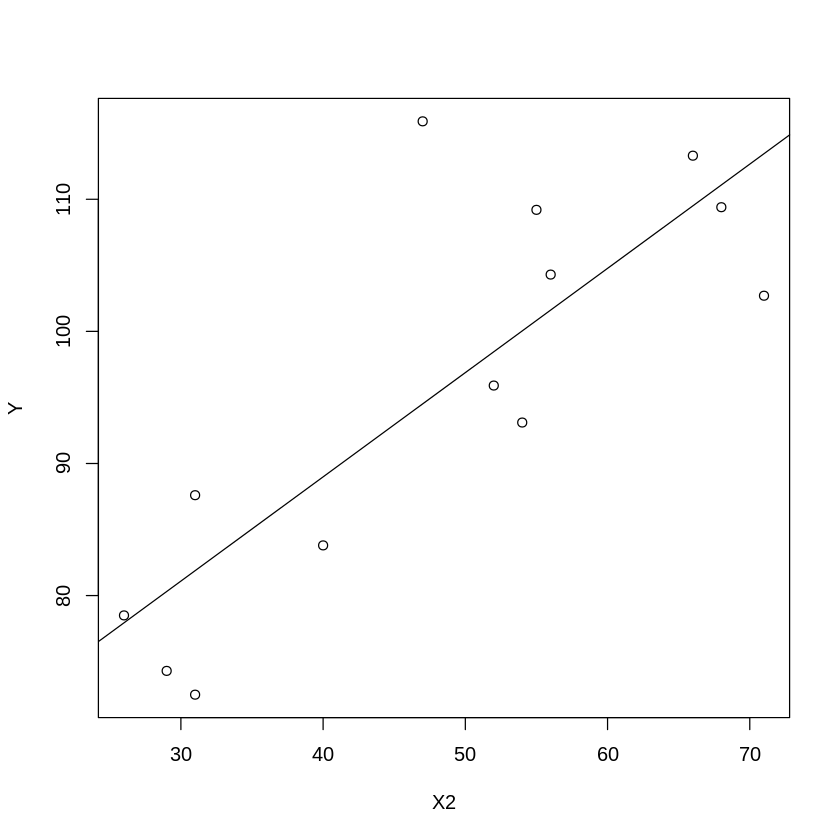

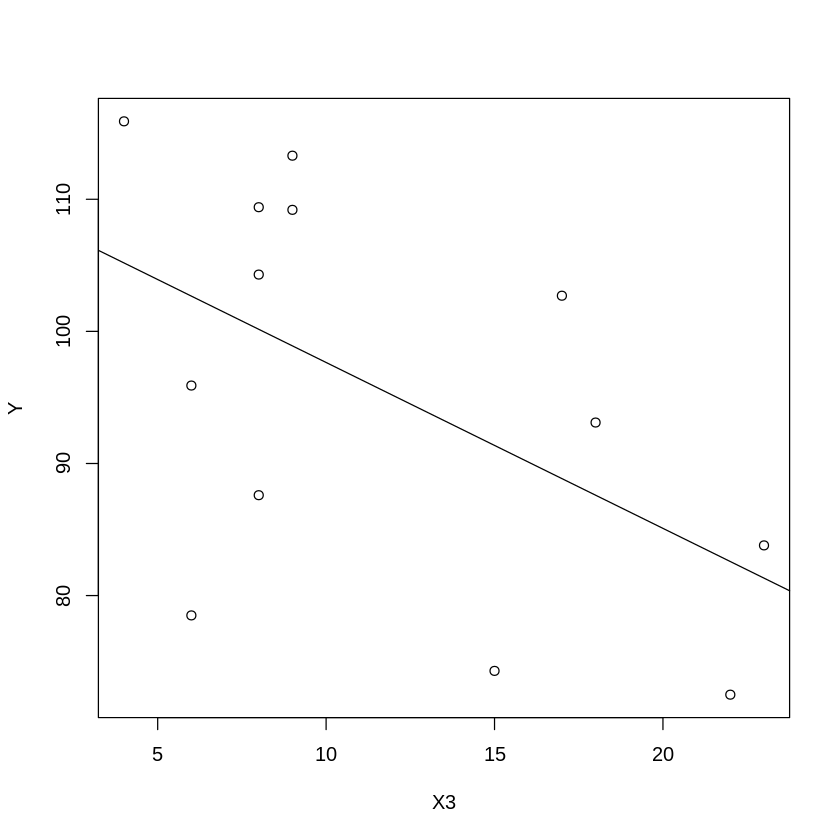

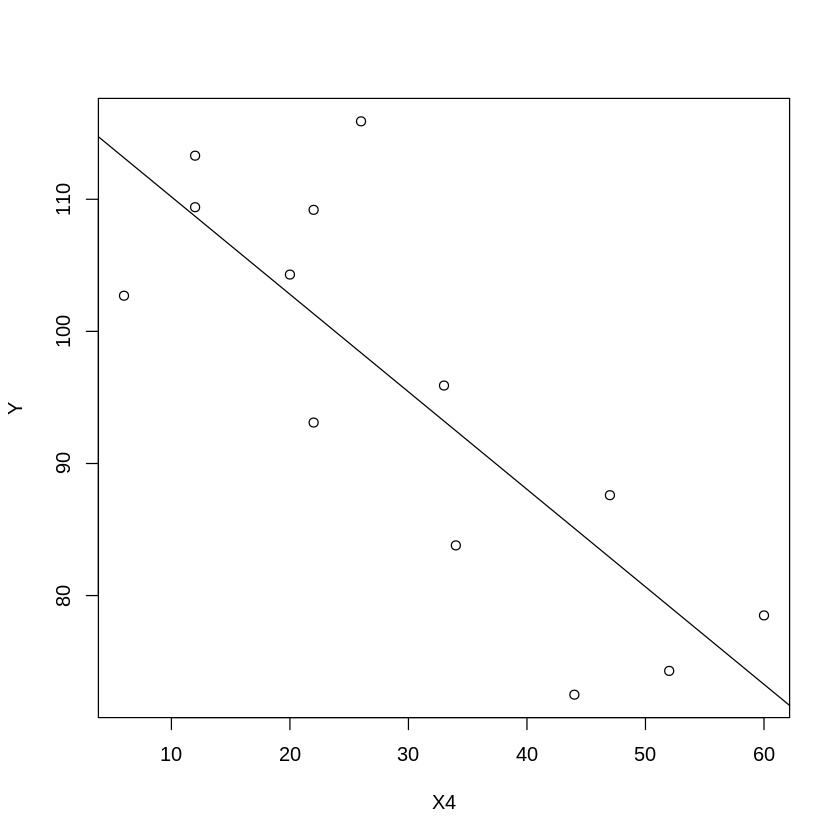

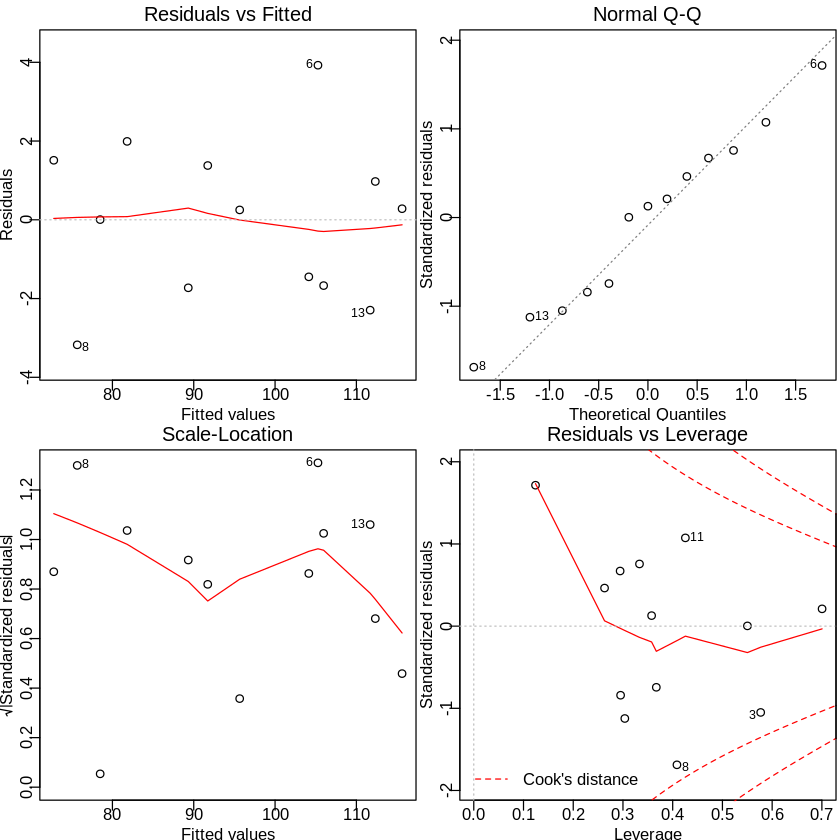

In [3]:
lm.sol<-lm(Y~X1+X2+X3+X4,cement)
summary(lm.sol)
plot(Y~X1);abline(lm(Y~X1))
plot(Y~X2);abline(lm(Y~X2))
plot(Y~X3);abline(lm(Y~X3))
plot(Y~X4);abline(lm(Y~X4))
oldpar = par(mfrow=c(2,2), mar=c(2,2,1.5,0.2), mgp=c(1.2, 0.2, 0))
plot(lm.sol)
par(oldpar)

In [4]:
lm.step<-step(lm.sol)
summary(lm.step)
drop1(lm.step)
lm.opt<-lm(Y~X1+X2,cement)
summary(lm.opt)
predict(lm.opt)
new.data=data.frame(X1=c(1,10,10,1,19,5,3,0,6,1,5,30,19),X2<-c(25,27,53,17,70,51,66,52,29,39,38,24,28))
predict(lm.opt, new.data)

Start:  AIC=26.94
Y ~ X1 + X2 + X3 + X4

       Df Sum of Sq    RSS    AIC
- X3    1    0.1091 47.973 24.974
- X4    1    0.2470 48.111 25.011
- X2    1    2.9725 50.836 25.728
<none>              47.864 26.944
- X1    1   25.9509 73.815 30.576

Step:  AIC=24.97
Y ~ X1 + X2 + X4

       Df Sum of Sq    RSS    AIC
<none>               47.97 24.974
- X4    1      9.93  57.90 25.420
- X2    1     26.79  74.76 28.742
- X1    1    820.91 868.88 60.629



Call:
lm(formula = Y ~ X1 + X2 + X4, data = cement)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0919 -1.8016  0.2562  1.2818  3.8982 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  71.6483    14.1424   5.066 0.000675 ***
X1            1.4519     0.1170  12.410 5.78e-07 ***
X2            0.4161     0.1856   2.242 0.051687 .  
X4           -0.2365     0.1733  -1.365 0.205395    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.309 on 9 degrees of freedom
Multiple R-squared:  0.9823,	Adjusted R-squared:  0.9764 
F-statistic: 166.8 on 3 and 9 DF,  p-value: 3.323e-08


,Df,Sum of Sq,RSS,AIC
,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,47.97273,24.97388
X1,1,820.907402,868.88013,60.62933
X2,1,26.789383,74.76211,28.74170
X4,1,9.931754,57.90448,25.41999



Call:
lm(formula = Y ~ X1 + X2, data = cement)

Residuals:
   Min     1Q Median     3Q    Max 
-2.893 -1.574 -1.302  1.363  4.048 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 52.57735    2.28617   23.00 5.46e-10 ***
X1           1.46831    0.12130   12.11 2.69e-07 ***
X2           0.66225    0.04585   14.44 5.03e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.406 on 10 degrees of freedom
Multiple R-squared:  0.9787,	Adjusted R-squared:  0.9744 
F-statistic: 229.5 on 2 and 10 DF,  p-value: 4.407e-09


1         2         3         4         5         6         7         8 
 80.07400  73.25092 105.81474  89.25848  97.29251 105.15249 104.00205  74.57542 
        9        10        11        12        13 
 91.27549 114.53754  80.53567 112.43724 112.29344

1         2         3         4         5         6         7         8 
 70.60192  85.14117 102.35968  65.30391 126.83269  93.69365 100.69080  87.01437 
        9        10        11        12        13 
 80.59245  79.87342  85.08440 112.52053  99.01817